# Exercise 10-1: Create a linear regression

## Get the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fish = pd.read_csv('Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [4]:
fish.rename(columns={'Length1':'VerticalLength', 
                     'Length2':'DiagonalLength', 
                     'Length3':'CrossLength'}, inplace=True)

## Identify a correlation

In [5]:
fish.corr()[['Weight']]

,Weight
Weight,1.000000
VerticalLength,0.915712
DiagonalLength,0.918618
CrossLength,0.923044
Height,0.724345
Width,0.886507


<AxesSubplot:>

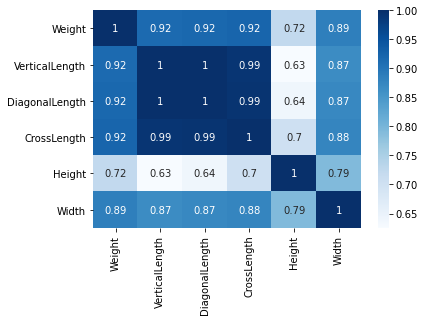

In [6]:
sns.heatmap(data=fish.corr(), annot=True, cmap='Blues')

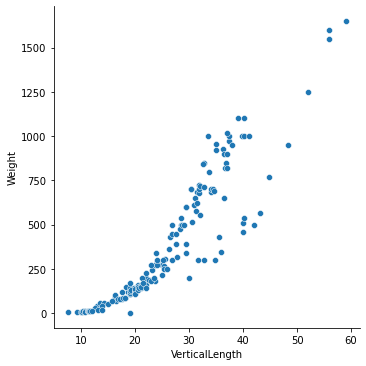

In [7]:
sns.relplot(data=fish, x='VerticalLength', y='Weight')

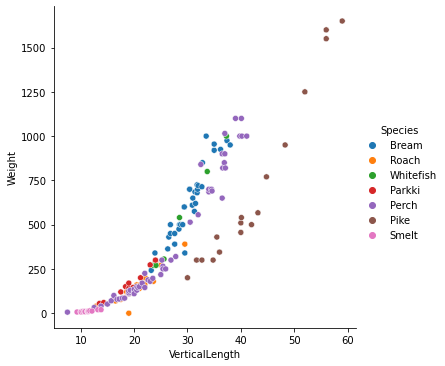

In [8]:
sns.relplot(data=fish, x='VerticalLength', y='Weight', hue='Species')

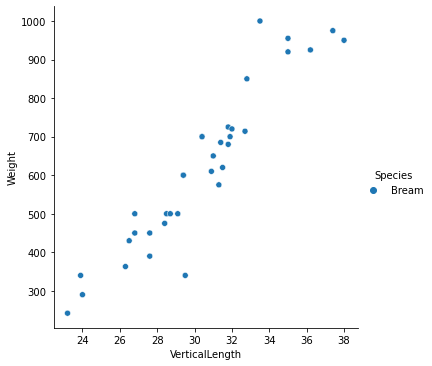

In [9]:
sns.relplot(data=fish.query('Species == "Bream"'), 
            x='VerticalLength', y='Weight', hue='Species')

## Create a linear model

In [10]:
bream = fish.query('Species == "Bream"')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    bream[['VerticalLength']], bream[['Weight']])

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
model.score(x_test, y_test)

0.768019642397219

In [14]:
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns = ['PredictedWeight'])

## Plot the regression line

In [15]:
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
final.head()

,PredictedWeight,VerticalLength,Weight
0,704.308739,32.0,720.0
1,518.204738,28.5,500.0
2,698.991482,31.9,700.0
3,651.136167,31.0,650.0
4,667.087939,31.3,575.0


In [16]:
# rename the Weight column to indicate that it stores actual values, not predicted values
final.rename(columns={'Weight':'ActualWeight'}, inplace=True)
final.head()

,PredictedWeight,VerticalLength,ActualWeight
0,704.308739,32.0,720.0
1,518.204738,28.5,500.0
2,698.991482,31.9,700.0
3,651.136167,31.0,650.0
4,667.087939,31.3,575.0


In [17]:
finalMelt = pd.melt(final, id_vars=['VerticalLength'], 
                    value_vars=['ActualWeight','PredictedWeight'], 
                    var_name='Variable', value_name='Value')
finalMelt.head()

,VerticalLength,Variable,Value
0,32.0,ActualWeight,720.0
1,28.5,ActualWeight,500.0
2,31.9,ActualWeight,700.0
3,31.0,ActualWeight,650.0
4,31.3,ActualWeight,575.0


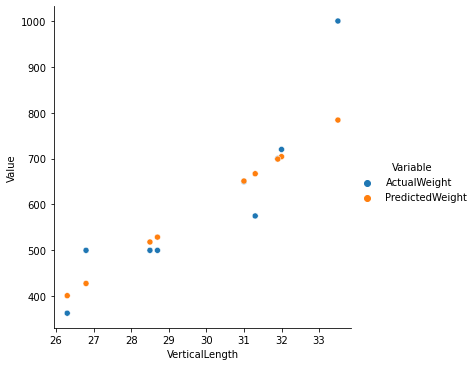

In [18]:
sns.relplot(data=finalMelt, x='VerticalLength', y='Value', hue='Variable')

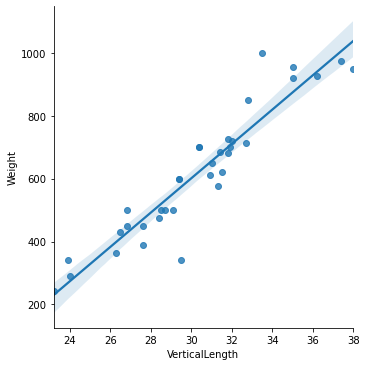

In [19]:
sns.lmplot(data=bream, x='VerticalLength', y='Weight')

## Plot the residuals

In [20]:
final['Residuals'] = final.ActualWeight - final.PredictedWeight

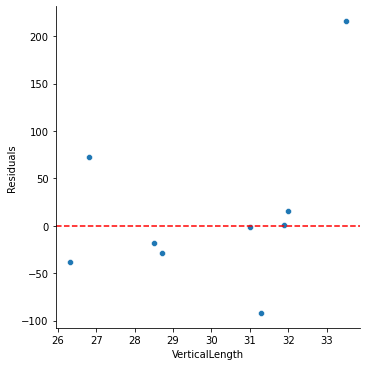

In [21]:
g = sns.relplot(data=final, x='VerticalLength', y='Residuals')
for ax in g.axes.flat:
    ax.axhline(0, ls='--', color='red')

<AxesSubplot:xlabel='VerticalLength', ylabel='Weight'>

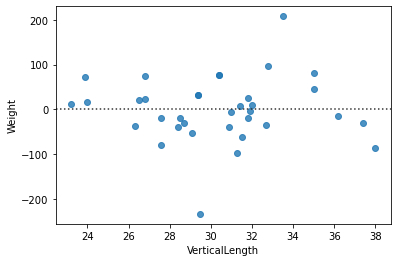

In [22]:
sns.residplot(data=bream, x='VerticalLength', y='Weight')